# Redo the single spherical fit and replot the figure

In [1]:
%run -i startup2.py

## Export the residuals to a file

Load the data.

In [5]:
info = pd.read_csv("data_info.csv")
info

,sample,iq,sq,fq,gr,fgr0,fgr1,fgr2,csv0,csv1,...,csv_two_phase,fgr_two_phase,csv_two_phase_sine_wave,fgr_two_phase_sine_wave,csv_one_phase_logsp,fgr_one_phase_logsp,csv_two_phase_logsp,fgr_two_phase_logsp,final_csv,final_fgr
0,JBNP31,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,data/JBNP31_20180812-155857_f2d424_0001_qmax22...,res/JBNP31_fix_xyz_0.fgr,res/JBNP31_free_xyz_0.fgr,res/JBNP31_free_xyz_add_delta_0.fgr,res/JBNP31_fix_xyz_0.csv,res/JBNP31_free_xyz_0.csv,...,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr,NaN,NaN,res/JBNP31_one_phase_logsp_0.csv,res/JBNP31_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP31_two_phase_0.csv,res/JBNP31_two_phase_0.fgr
1,JBNP32L,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,data/JBNP32L_20180812-161119_2a1898_0001_qmax2...,res/JBNP32L_fix_xyz_0.fgr,res/JBNP32L_free_xyz_2.fgr,res/JBNP32L_free_xyz_add_delta_1.fgr,res/JBNP32L_fix_xyz_0.csv,res/JBNP32L_free_xyz_2.csv,...,NaN,NaN,res/JBNP32L_two_phase_sine_wave_0.csv,res/JBNP32L_two_phase_sine_wave_0.fgr,res/JBNP32L_one_phase_logsp_0.csv,res/JBNP32L_one_phase_logsp_0.fgr,res/JBNP32L_two_phase_logsp_0.csv,res/JBNP32L_two_phase_logsp_0.fgr,res/JBNP32L_add_sine_wave_0.csv,res/JBNP32L_add_sine_wave_0.fgr
2,JBNP32,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,data/JBNP32_20180812-154511_c241b0_0001_qmax22...,res/JBNP32_fix_xyz_0.fgr,res/JBNP32_free_xyz_0.fgr,res/JBNP32_free_xyz_add_delta_0.fgr,res/JBNP32_fix_xyz_0.csv,res/JBNP32_free_xyz_0.csv,...,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr,NaN,NaN,res/JBNP32_one_phase_logsp_0.csv,res/JBNP32_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP32_two_phase_1.csv,res/JBNP32_two_phase_1.fgr
3,JBNP33L,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,data/JBNP33L_20180812-162201_05b4b9_0001_qmax2...,res/JBNP33L_fix_xyz_0.fgr,res/JBNP33L_free_xyz_0.fgr,res/JBNP33L_free_xyz_add_delta_0.fgr,res/JBNP33L_fix_xyz_0.csv,res/JBNP33L_free_xyz_0.csv,...,NaN,NaN,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr,res/JBNP33L_one_phase_logsp_1.csv,res/JBNP33L_one_phase_logsp_1.fgr,res/JBNP33L_two_phase_logsp_0.csv,res/JBNP33L_two_phase_logsp_0.fgr,res/JBNP33L_two_phase_sine_wave_0.csv,res/JBNP33L_two_phase_sine_wave_0.fgr
4,JBNP33,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,data/JBNP33_20180812-153159_3bdc30_0001_qmax22...,res/JBNP33_fix_xyz_0.fgr,res/JBNP33_free_xyz_0.fgr,res/JBNP33_free_xyz_add_delta_0.fgr,res/JBNP33_fix_xyz_0.csv,res/JBNP33_free_xyz_0.csv,...,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr,NaN,NaN,res/JBNP33_one_phase_logsp_0.csv,res/JBNP33_one_phase_logsp_0.fgr,NaN,NaN,res/JBNP33_two_phase_0.csv,res/JBNP33_two_phase_0.fgr


In [3]:
# data profile
profile = io.load_profile(info.loc[3]["gr"], {"qdamp":0.0313, "qbroad": 0.0131})

Export the residuals after the bronze and ligand is subtracted.

In [6]:
model = create_model_single_bronze()
model.set_profile(profile)
model.load("results4/JBNP33L_single_lognormal.txt")
model.set_xrange(1.6, 50.0, 0.01)

In [7]:
model.set_order(["B_scale", "B_f_psize"], "B_lat", "B_adp", "B_xyz")
model.optimize()

Start fit with all parameters fixed.
Round 1 / 4: Free B_scale, B_f_psize ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 1.5096e+02, final cost 6.3647e+01, first-order optimality 3.88e-03.
Round 2 / 4: Free B_lat ...
`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 6.3647e+01, final cost 1.6357e+01, first-order optimality 3.26e-01.
Round 3 / 4: Free B_adp ...
`ftol` termination condition is satisfied.
Function evaluations 8, initial cost 1.6357e+01, final cost 1.5011e+01, first-order optimality 4.10e-01.
Round 4 / 4: Free B_xyz ...
`xtol` termination condition is satisfied.
Function evaluations 15, initial cost 1.5011e+01, final cost 7.6859e+00, first-order optimality 4.25e+00.
Optimization result: Rw = 0.231625.


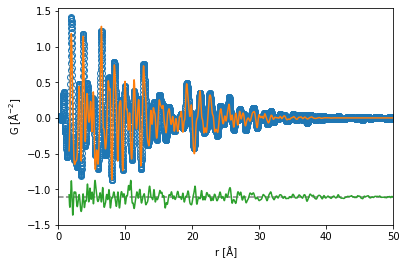

In [8]:
model.plot()

In [9]:
model.save_all("results4", "JBNP33L_single_spherical")

## Replot the figure

The PDFitc thinks the Anatase is the optimal candidate. It is correct.

In [2]:
fits0 = xr.load_dataset("results4/JBNP33L_single_spherical_fits.nc")
fits1 = xr.load_dataset("results4/JBNP33L_single_lognormal_fits.nc")

In [4]:
xlim = slice(35, 50)
sel_fits0 = fits0.sel({"xobs": xlim, "x": xlim})
sel_fits1 = fits1.sel({"xobs": xlim, "x": xlim})

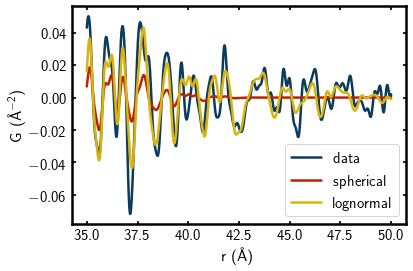

In [7]:
bg_mpl_file = "/Users/sst/PycharmProjects/bg-mpl-stylesheets/bg_mpl_stylesheet/bg_mpl_stylesheet"
with plt.style.context(bg_mpl_file):
    colors = get_colors()
    fig, ax = plt.subplots()
    sel_fits0["yobs"].plot(ax=ax, label="data", color=colors[0])
    sel_fits0["ycalc"].plot(ax=ax, label="spherical", color=colors[1])
    sel_fits1["ycalc"].plot(ax=ax, label="lognormal", color=colors[5])
    ax.legend()
    use_parentheses(ax)
    plt.show()
    fig.savefig("figure/spherical-vs-lognormal.pdf")